In [1]:
import numpy as np
from pathlib import Path

import sys
sys.path.append("../")

DATA_FOLDER = Path("/home","carlyn.1","dna-trait-analysis","results","debug","all_genes_forewings_color_3")

test_att = np.load(DATA_FOLDER / "att_points.npz")["test"]

In [2]:
# Load experiment
from experiments import get_all_gene_experiments, get_all_large_genes
from dataclasses import dataclass

@dataclass
class GeneData:
    gene: str
    size: int

exps = get_all_gene_experiments("erato", "forewings", "color_1")
gene_data = [GeneData(ex.gene.split("_")[-1], np.load(ex.gene_vcf_path)['arr_0'].shape[1]) for ex in exps]
gene_data


[GeneData(gene='wntA', size=86152),
 GeneData(gene='elf1a', size=87380),
 GeneData(gene='vvl', size=52768),
 GeneData(gene='cortex', size=56465),
 GeneData(gene='optix', size=57437)]

Plotting Genes: 0it [00:00, ?it/s]

Plotting Genes: 5it [02:49, 33.96s/it]


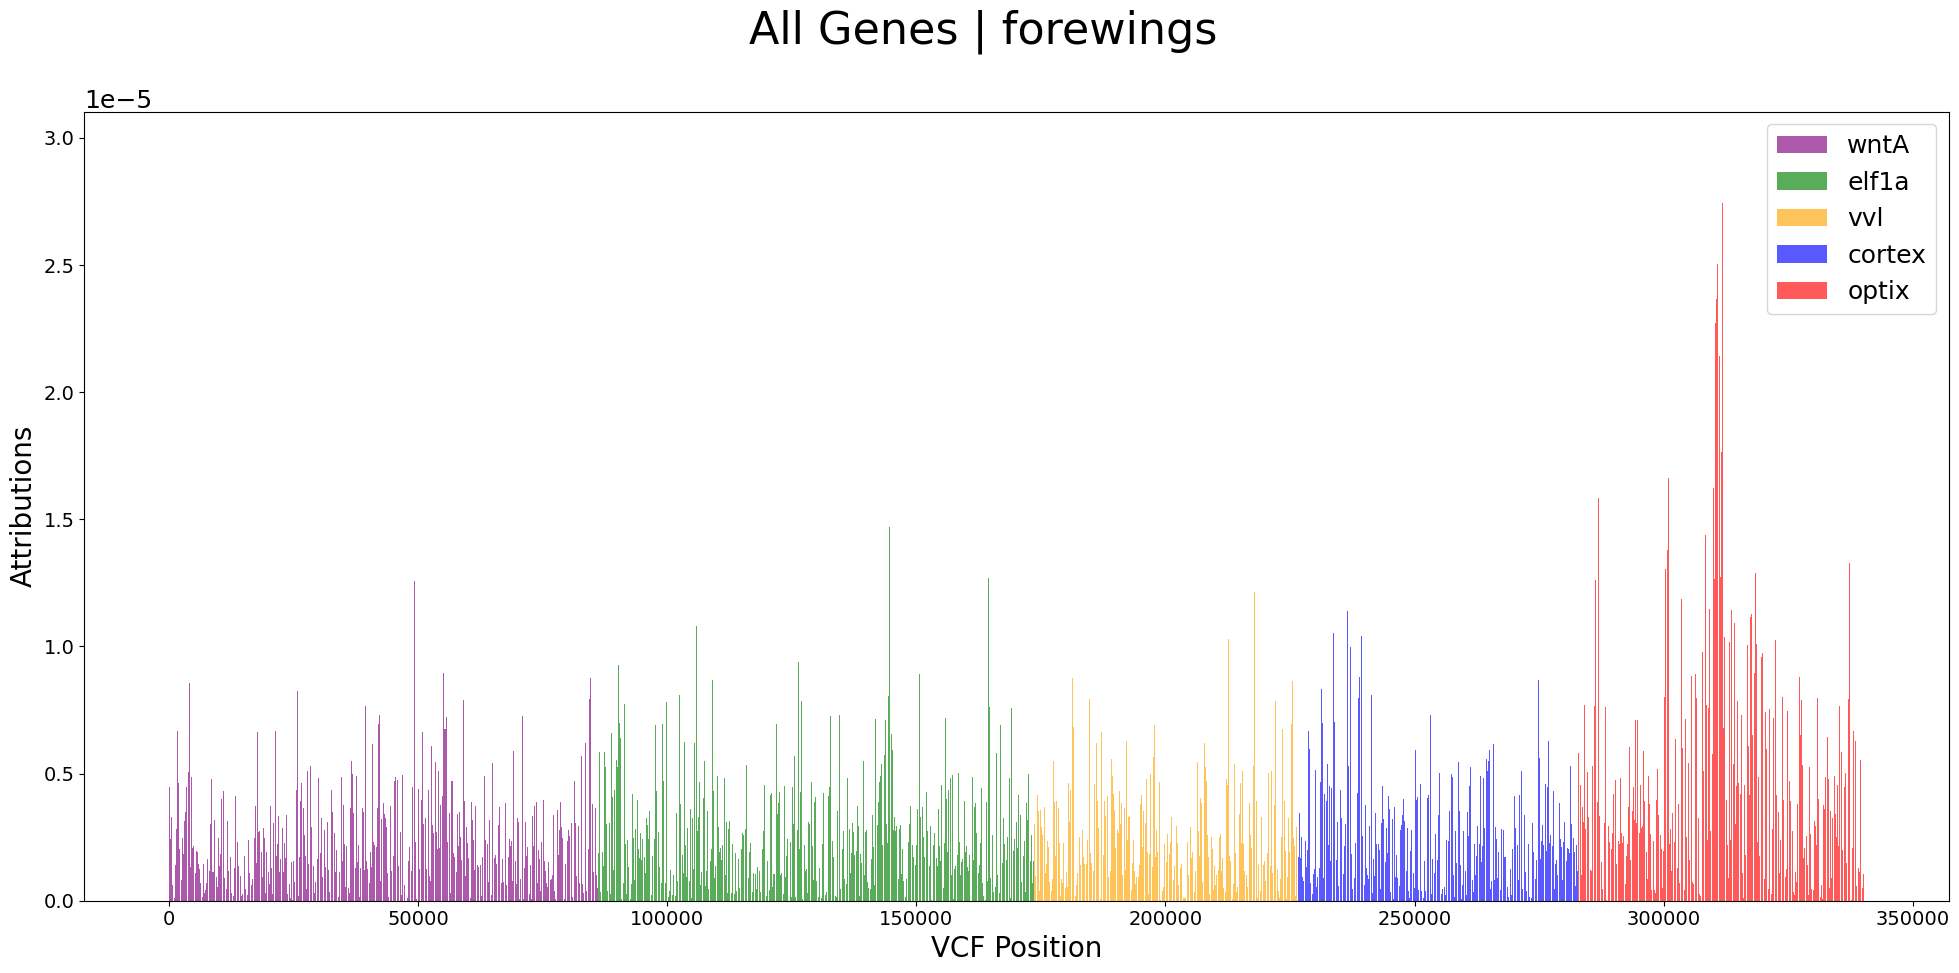

In [11]:
import matplotlib.pyplot as plt
from tqdm import tqdm

colors = ["purple", "green", "orange", "blue", "red"]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
fig.suptitle(f"All Genes | {exps[0].wing_side}", fontsize=32)
plt.ylabel('Attributions', fontsize=20)
plt.xlabel('VCF Position', fontsize=20)

FONT_SIZE = 18
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('legend', fontsize=FONT_SIZE)  # fontsize of the legend
plt.rc('axes', labelsize='medium', titlesize='large')

ax.tick_params(axis='both', labelsize=14)

#ax.set_ylim([0, 1.1])
test_att = np.abs(test_att)
x_max = test_att.shape[0]
#ax.set_xlim([0, x_max])
X = np.arange(x_max)
prev = 0
for i, gd in tqdm(enumerate(gene_data), desc="Plotting Genes"):
    ax.bar(X[prev:prev+gd.size], test_att[prev:prev+gd.size], align='center', alpha=0.65, color=colors[i], label=gd.gene)
    prev += gd.size
ax.legend()
plt.tight_layout()
plt.show()
plt.close()